In [444]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
bumrah_url = "https://www.espncricinfo.com/cricketers/jasprit-bumrah-625383"
shami_url = "https://www.espncricinfo.com/cricketers/mohammed-shami-481896"

In [139]:
def scrape_overall_bowling_stats(player_url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(player_url, headers=headers)
    
    if response.status_code != 200:
        return f"Failed to fetch data for {bumrah_url}"
    
    soup = BeautifulSoup(response.content, "html.parser")
    
    div = soup.find("div", {"class": "ds-overflow-x-auto ds-scrollbar-hide"})
    
    table = div.find("table", {"class": "ds-w-full ds-table ds-table-md ds-table-bordered ds-border-collapse ds-border ds-border-line ds-table-auto ds-overflow-scroll"})
    
    headers = [th.text.strip() for th in table.find_all("th")]
    
    data = []
    for row in table.find_all("tr")[1:]:
        cols = row.find_all("td")
        data.append([col.text.strip() for col in cols])
    
    df = pd.DataFrame(data, columns=headers)
    
    df = df[df['Format'].isin(['T20Is', 'ODIs'])]

    return df

In [333]:
bumrah_overall_stats = scrape_overall_bowling_stats(bumrah_url)
shami_overall_stats = scrape_overall_bowling_stats(shami_url)

In [335]:
def extract_wickets_runs(value):
    wickets, runs = value.split('/')
    return int(wickets), int(runs)

bumrah_overall_stats['BBI_Wickets'], bumrah_overall_stats['BBI_Runs'] = zip(*bumrah_overall_stats['BBI'].apply(extract_wickets_runs))
shami_overall_stats['BBM_Wickets'], shami_overall_stats['BBM_Runs'] = zip(*shami_overall_stats['BBM'].apply(extract_wickets_runs))

bumrah_overall_stats.drop(columns=['BBI', 'BBM'], inplace=True)
shami_overall_stats.drop(columns=['BBI', 'BBM'], inplace=True)

In [361]:
merged_df = pd.merge(bumrah_overall_stats, shami_overall_stats, on='Format', suffixes=('_Bumrah', '_Shami'))

merged_df.set_index('Format', inplace=True)

In [391]:
merged_df.head()

,Format,Mat_Bumrah,Inns_Bumrah,Balls_Bumrah,Runs_Bumrah,Wkts_Bumrah,Ave_Bumrah,Econ_Bumrah,SR_Bumrah,4w_Bumrah,...,Runs_Shami,Wkts_Shami,Ave_Shami,Econ_Shami,SR_Shami,4w_Shami,5w_Shami,10w_Shami,BBM_Wickets,BBM_Runs
0,ODIs,89,88,4580,3509,149,23.55,4.59,30.7,6,...,4618,195,23.68,5.55,25.5,10,5,0,7,57
1,T20Is,70,69,1509,1579,89,17.74,6.27,16.9,0,...,761,27,28.18,8.95,18.8,0,0,0,3,15


In [371]:
merged_df = merged_df.apply(pd.to_numeric, errors='ignore')

C:\Users\chara\AppData\Local\Temp\ipykernel_16192\4139865043.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  merged_df = merged_df.apply(pd.to_numeric, errors='ignore')


In [381]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, ODIs to T20Is
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mat_Bumrah    2 non-null      int64  
 1   Inns_Bumrah   2 non-null      int64  
 2   Balls_Bumrah  2 non-null      int64  
 3   Runs_Bumrah   2 non-null      int64  
 4   Wkts_Bumrah   2 non-null      int64  
 5   Ave_Bumrah    2 non-null      float64
 6   Econ_Bumrah   2 non-null      float64
 7   SR_Bumrah     2 non-null      float64
 8   4w_Bumrah     2 non-null      int64  
 9   5w_Bumrah     2 non-null      int64  
 10  10w_Bumrah    2 non-null      int64  
 11  BBI_Wickets   2 non-null      int64  
 12  BBI_Runs      2 non-null      int64  
 13  Mat_Shami     2 non-null      int64  
 14  Inns_Shami    2 non-null      int64  
 15  Balls_Shami   2 non-null      int64  
 16  Runs_Shami    2 non-null      int64  
 17  Wkts_Shami    2 non-null      int64  
 18  Ave_Shami     2 non-null      fl

In [375]:
merged_df['WPM_Bumrah'] = merged_df['Wkts_Bumrah'] / merged_df['Mat_Bumrah']
merged_df['WPM_Shami'] = merged_df['Wkts_Shami'] / merged_df['Mat_Shami']

In [387]:
merged_df = pd.merge(bumrah_overall_stats, shami_overall_stats, on='Format', suffixes=('_Bumrah', '_Shami'))

In [436]:
merged_df

,Format,Mat_Bumrah,Inns_Bumrah,Balls_Bumrah,Runs_Bumrah,Wkts_Bumrah,Ave_Bumrah,Econ_Bumrah,SR_Bumrah,4w_Bumrah,...,Runs_Shami,Wkts_Shami,Ave_Shami,Econ_Shami,SR_Shami,4w_Shami,5w_Shami,10w_Shami,BBM_Wickets,BBM_Runs
0,ODIs,89,88,4580,3509,149,23.55,4.59,30.7,6,...,4618,195,23.68,5.55,25.5,10,5,0,7,57
1,T20Is,70,69,1509,1579,89,17.74,6.27,16.9,0,...,761,27,28.18,8.95,18.8,0,0,0,3,15


In [3]:
bumrah_aust_url = "https://www.espncricinfo.com/cricketers/jasprit-bumrah-625383/bowling-batting-stats"
shami_aust_url = "https://www.espncricinfo.com/cricketers/mohammed-shami-481896/bowling-batting-stats"

In [141]:
def scrape_australian_bowling_stats(player_url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(player_url, headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to fetch data for {burmah_url}")
    
    soup = BeautifulSoup(response.content, "html.parser")
    
    table = soup.find_all('table')[2]
    
    headers = [th.text.strip() for th in table.find_all("th")]
    
    data = []
    for row in table.find_all("tr")[1:]:
        cols = row.find_all("td")
        data.append([col.text.strip() for col in cols])
        if "Australia" in cols:
            data.append(cols)
    
    df = pd.DataFrame(data, columns=headers)
    df = df[df[''] == 'in Australia']
    return df

In [428]:
bumrah_aust_stats = scrape_australian_bowling_stats(bumrah_aust_url)
shami_aust_stats =  scrape_australian_bowling_stats(shami_aust_url)

In [430]:
bumrah_aust_stats = bumrah_aust_stats.apply(pd.to_numeric, errors='ignore')
shami_aust_stats = shami_aust_stats.apply(pd.to_numeric, errors='ignore')

C:\Users\chara\AppData\Local\Temp\ipykernel_16192\1990228478.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  bumrah_aust_stats = bumrah_aust_stats.apply(pd.to_numeric, errors='ignore')
C:\Users\chara\AppData\Local\Temp\ipykernel_16192\1990228478.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  shami_aust_stats = shami_aust_stats.apply(pd.to_numeric, errors='ignore')


In [432]:
bumrah_aust_stats.drop('',axis=1, inplace=True)

bumrah_aust_stats.drop('Span', axis=1, inplace=True)

shami_aust_stats.drop('',axis=1, inplace=True)

shami_aust_stats.drop('Span', axis=1, inplace=True)

In [ ]:
bumrah_aust_stats.set_index()

In [434]:
bumrah_aust_stats['WPM'] = bumrah_aust_stats['Wkts'] / bumrah_aust_stats['Mat']
shami_aust_stats['WPM'] = shami_aust_stats['Wkts'] / shami_aust_stats['Mat']

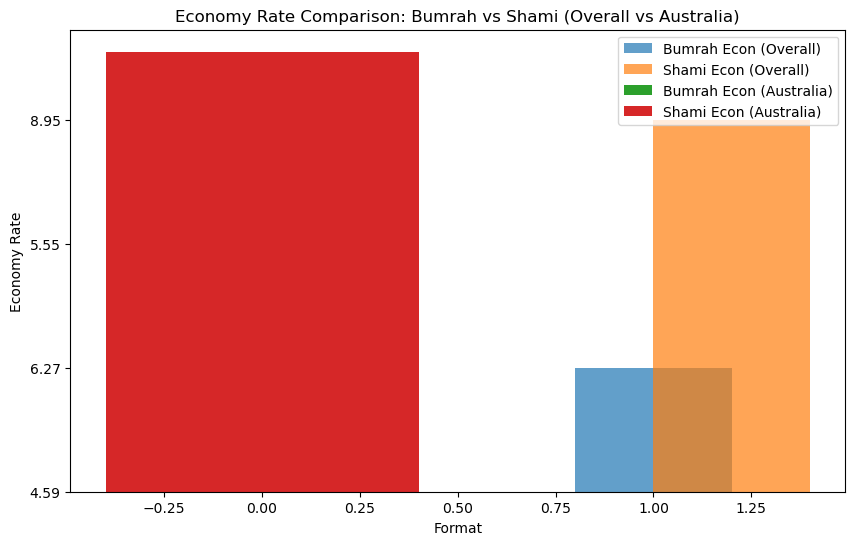

In [440]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(merged_df.index, merged_df['Econ_Bumrah'], label='Bumrah Econ (Overall)', alpha=0.7, width=0.4, align='center')
ax.bar(merged_df.index, merged_df['Econ_Shami'], label='Shami Econ (Overall)', alpha=0.7, width=0.4, align='edge')

ax.bar(bumrah_aust_stats.index, bumrah_aust_stats['Econ'], label='Bumrah Econ (Australia)')
ax.bar(shami_aust_stats.index, shami_aust_stats['Econ'], label='Shami Econ (Australia)')

ax.set_xlabel('Format')
ax.set_ylabel('Economy Rate')
ax.set_title('Economy Rate Comparison: Bumrah vs Shami (Overall vs Australia)')
ax.legend()

plt.show()

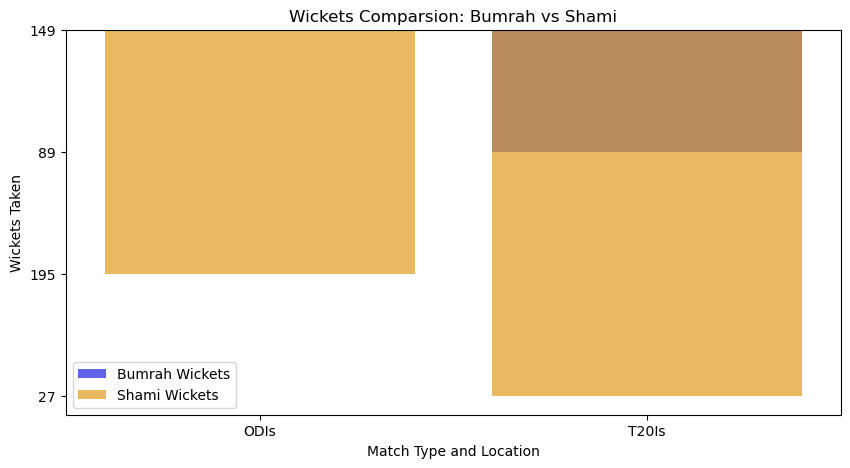

In [448]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Format', y='Wkts_Bumrah', data=merged_df, color='blue', label='Bumrah Wickets', alpha=0.7)
sns.barplot(x='Format', y='Wkts_Shami', data=merged_df, color='orange', label='Shami Wickets', alpha=0.7)
plt.title('Wickets Comparsion: Bumrah vs Shami')
plt.xlabel('Match Type and Location')
plt.ylabel('Wickets Taken')
plt.legend()
plt.show()

### Conclusion: 
Jasprit Bumrah is the better choice for the Australian series due to his superior bowling stats both overall and in Australia. His ability to bowl with consistency and control makes him invaluable asset to the team.